# TP - Python

### Membres: 
- Alex KEITA N DIAYE
- Youssef AZAIEZ
- Benjmain KICHENAMOURTY

***

## Installation des libraires

In [1]:
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install chart_studio

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (25.9 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


</br>

## Import des libraires

In [2]:
# Import pour analyses

import pandas as pd
pd.options.mode.chained_assignment = None
import plotly.figure_factory as ff
import numpy as np
from matplotlib.patches import ConnectionPatch
import time
import json,re
from pandas_profiling import ProfileReport
from datetime import datetime

# Imports graphe
import matplotlib.pyplot as plt

# Render our plots inline
%matplotlib inline
plt.rcParams['animation.html'] = 'jshtml'
plt.rcParams['figure.figsize'] = (15, 10)

# Parametrage de la connexion à Plotly
import chart_studio
from chart_studio import plotly as py
chart_studio.tools.set_credentials_file(username='idriss74', api_key='rddr73umyr')

# Import chart
from plotly import __version__
from chart_studio.grid_objs import Grid, Column
from plotly.tools import FigureFactory as FF
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Jupyter setup
init_notebook_mode(connected=True)

</br> 

## Chargement et Filtrage des données

In [3]:
# Cleaning Data (csv)

df = pd.read_csv('database.csv', sep=',', dtype={'Perpetrator Age': str, 'Victim Age': str}, index_col='Record ID')
df['Perpetrator Age'] = df['Perpetrator Age'].replace({' ': '0'})
df['Perpetrator Age'] = pd.to_numeric(df['Perpetrator Age'])
df['Victim Age'] = pd.to_numeric(df['Victim Age'])
df

,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
Record ID,,,,,,,,,,,,,,,,,,,,,
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638450,WY01500,Park County,Sheriff,Park,Wyoming,2014,January,1,Murder or Manslaughter,No,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,0,0,FBI
638451,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,2014,June,1,Murder or Manslaughter,Yes,...,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,0,0,FBI
638452,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,2014,September,1,Murder or Manslaughter,Yes,...,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,0,0,FBI


In [4]:
df.shape

(638454, 23)

In [5]:
df.columns

Index(['Agency Code', 'Agency Name', 'Agency Type', 'City', 'State', 'Year',
       'Month', 'Incident', 'Crime Type', 'Crime Solved', 'Victim Sex',
       'Victim Age', 'Victim Race', 'Victim Ethnicity', 'Perpetrator Sex',
       'Perpetrator Age', 'Perpetrator Race', 'Perpetrator Ethnicity',
       'Relationship', 'Weapon', 'Victim Count', 'Perpetrator Count',
       'Record Source'],
      dtype='object')

In [6]:
def check_uniques(df):
    colonnes = list(df.columns)
    for col in colonnes[1:]:
        print(col + ' : ' + str(list(df[col].unique())) + '\n')

In [7]:
df_crime = df.drop(['Agency Name', 'Agency Type', 'Record Source','Perpetrator Count','Victim Count','Perpetrator Ethnicity','Perpetrator Race','Victim Ethnicity','Victim Race', 'Incident', 'Agency Code'], axis=1)
df_crime

,City,State,Year,Month,Crime Type,Crime Solved,Victim Sex,Victim Age,Perpetrator Sex,Perpetrator Age,Relationship,Weapon
Record ID,,,,,,,,,,,,
1,Anchorage,Alaska,1980,January,Murder or Manslaughter,Yes,Male,14,Male,15,Acquaintance,Blunt Object
2,Anchorage,Alaska,1980,March,Murder or Manslaughter,Yes,Male,43,Male,42,Acquaintance,Strangulation
3,Anchorage,Alaska,1980,March,Murder or Manslaughter,No,Female,30,Unknown,0,Unknown,Unknown
4,Anchorage,Alaska,1980,April,Murder or Manslaughter,Yes,Male,43,Male,42,Acquaintance,Strangulation
5,Anchorage,Alaska,1980,April,Murder or Manslaughter,No,Female,30,Unknown,0,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
638450,Park,Wyoming,2014,January,Murder or Manslaughter,No,Male,30,Unknown,0,Unknown,Handgun
638451,Sheridan,Wyoming,2014,June,Murder or Manslaughter,Yes,Male,62,Male,57,Acquaintance,Handgun
638452,Sheridan,Wyoming,2014,September,Murder or Manslaughter,Yes,Female,0,Female,22,Daughter,Suffocation


In [8]:
solved_cases = df_crime.loc[(df_crime['Crime Type']=='Murder or Manslaughter')&(df_crime['Crime Solved']=='Yes')]
solved_cases = solved_cases.drop(['Crime Type','Crime Solved'],axis=1)
solved_cases = solved_cases.rename(columns={'Agency Name':'AgencyName', 'Agency Type':'AgencyType', 'Victim Sex':'V_Sex', 'Victim Age':'V_Age', 'Perpetrator Sex':'K_Sex', 'Perpetrator Age':'K_Age'})
solved_cases

,City,State,Year,Month,V_Sex,V_Age,K_Sex,K_Age,Relationship,Weapon
Record ID,,,,,,,,,,
1,Anchorage,Alaska,1980,January,Male,14,Male,15,Acquaintance,Blunt Object
2,Anchorage,Alaska,1980,March,Male,43,Male,42,Acquaintance,Strangulation
4,Anchorage,Alaska,1980,April,Male,43,Male,42,Acquaintance,Strangulation
6,Anchorage,Alaska,1980,May,Male,30,Male,36,Acquaintance,Rifle
7,Anchorage,Alaska,1980,May,Female,42,Male,27,Wife,Knife
...,...,...,...,...,...,...,...,...,...,...
638449,Natrona,Wyoming,2014,August,Male,29,Male,67,Friend,Firearm
638451,Sheridan,Wyoming,2014,June,Male,62,Male,57,Acquaintance,Handgun
638452,Sheridan,Wyoming,2014,September,Female,0,Female,22,Daughter,Suffocation


In [9]:
clean_data = solved_cases.loc[(solved_cases['V_Sex']!='Unknown') & (solved_cases['K_Sex']!='Unknown')]
clean_data

,City,State,Year,Month,V_Sex,V_Age,K_Sex,K_Age,Relationship,Weapon
Record ID,,,,,,,,,,
1,Anchorage,Alaska,1980,January,Male,14,Male,15,Acquaintance,Blunt Object
2,Anchorage,Alaska,1980,March,Male,43,Male,42,Acquaintance,Strangulation
4,Anchorage,Alaska,1980,April,Male,43,Male,42,Acquaintance,Strangulation
6,Anchorage,Alaska,1980,May,Male,30,Male,36,Acquaintance,Rifle
7,Anchorage,Alaska,1980,May,Female,42,Male,27,Wife,Knife
...,...,...,...,...,...,...,...,...,...,...
638449,Natrona,Wyoming,2014,August,Male,29,Male,67,Friend,Firearm
638451,Sheridan,Wyoming,2014,June,Male,62,Male,57,Acquaintance,Handgun
638452,Sheridan,Wyoming,2014,September,Female,0,Female,22,Daughter,Suffocation


In [10]:
df_temp = clean_data.loc[(clean_data['V_Age']!=998)]
moy_vAge = df_temp['V_Age'].mean()
moy_vAge

33.39213711285467

In [11]:
df_temp1 = clean_data.loc[(clean_data['K_Age']!=0)]
moy_kAge = df_temp1['K_Age'].mean()
moy_kAge

30.803768490398202

In [12]:
clean_data['V_Age'] = clean_data['V_Age'].replace({998: 33})

In [13]:
clean_data['K_Age'] = clean_data['K_Age'].replace({0: 31})

In [14]:
check_uniques(clean_data)

State : ['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California', 'Colorado', 'Connecticut', 'District of Columbia', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Mississippi', 'Montana', 'Nebraska', 'North Carolina', 'North Dakota', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhodes Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia', 'Wyoming']

Year : [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]

Month : ['January', 'March', 'April', 'May', 'June', 'July', 'August', 'December', 'November', 'February', 'October', 'Septe

In [15]:
clean_data

,City,State,Year,Month,V_Sex,V_Age,K_Sex,K_Age,Relationship,Weapon
Record ID,,,,,,,,,,
1,Anchorage,Alaska,1980,January,Male,14,Male,15,Acquaintance,Blunt Object
2,Anchorage,Alaska,1980,March,Male,43,Male,42,Acquaintance,Strangulation
4,Anchorage,Alaska,1980,April,Male,43,Male,42,Acquaintance,Strangulation
6,Anchorage,Alaska,1980,May,Male,30,Male,36,Acquaintance,Rifle
7,Anchorage,Alaska,1980,May,Female,42,Male,27,Wife,Knife
...,...,...,...,...,...,...,...,...,...,...
638449,Natrona,Wyoming,2014,August,Male,29,Male,67,Friend,Firearm
638451,Sheridan,Wyoming,2014,June,Male,62,Male,57,Acquaintance,Handgun
638452,Sheridan,Wyoming,2014,September,Female,0,Female,22,Daughter,Suffocation


</br>

---
</br>


## Criminalité feminine envers les enfants par suffocation de 1984 jusqu'en 2014
</br>

### **A - Criminalité feminine envers les enfants par suffocation (1984/1999)**


Premièrement nous allons nous concentrer sur la fin du 20ème siècle

In [16]:
female_k_20 = clean_data.loc[(clean_data['K_Sex'] == "Female") & (clean_data['Year'] < 2000 ) & (clean_data['V_Age'] < 15 )]
female_k_20

,City,State,Year,Month,V_Sex,V_Age,K_Sex,K_Age,Relationship,Weapon
Record ID,,,,,,,,,,
567,Boone,Arkansas,1980,April,Female,0,Female,32,Daughter,Blunt Object
769,Washington,Arkansas,1980,September,Female,0,Female,22,Daughter,Blunt Object
973,Pima,Arizona,1980,February,Male,5,Female,23,Acquaintance,Handgun
1066,Yuma,Arizona,1980,February,Female,0,Female,19,Daughter,Blunt Object
1515,Kern,California,1980,September,Male,3,Female,25,Son,Blunt Object
...,...,...,...,...,...,...,...,...,...,...
401979,Cowlitz,Washington,1999,September,Female,4,Female,31,Acquaintance,Drowning
402065,Snohomish,Washington,1999,August,Female,0,Female,18,Daughter,Blunt Object
402074,Spokane,Washington,1999,September,Female,8,Female,41,Daughter,Knife


In [17]:
pd.crosstab(female_k_20.Weapon, female_k_20.Year)

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
Weapon,,,,,,,,,,,,,,,,,,,,
Blunt Object,90,86,104,101,92,82,120,82,83,100,95,108,104,115,133,106,123,125,85,98
Drowning,8,6,7,15,10,11,21,19,17,16,8,20,9,5,3,13,11,15,16,13
Drugs,0,1,1,1,2,4,0,0,0,7,2,4,1,3,1,4,3,8,8,1
Explosives,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,5,0,1,0,0
Fall,3,1,1,1,0,1,1,2,1,0,0,1,0,1,0,2,0,1,0,1
Fire,20,15,12,11,6,10,13,13,13,15,5,7,8,6,12,13,16,8,13,15
Firearm,0,0,0,0,0,0,0,0,1,1,1,0,2,0,0,0,3,3,2,0
Gun,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Handgun,21,22,22,20,14,15,16,17,22,19,13,16,12,26,13,17,13,26,19,13


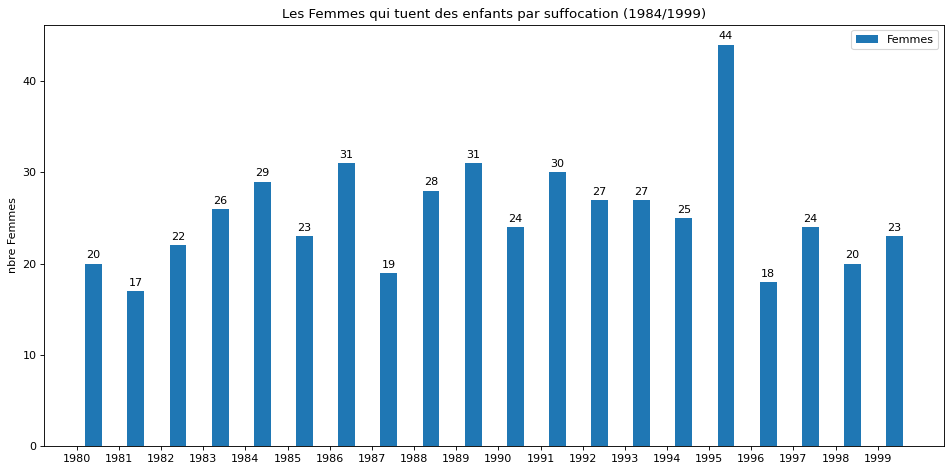

In [18]:
labels = ['1980', '1981', '1982', '1983', '1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999']
women_means = [20,17,22,26,29,23,31,19,28,31,24,30,27,27,25,44,18,24,20,23]

x = np.arange(len(labels))  
width = 0.4

fig, ax = plt.subplots(figsize=(12, 6), dpi=80)
rects1 = ax.bar(x + width, women_means, width, label='Femmes')

ax.set_ylabel('nbre Femmes')
ax.set_title('année')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
fig.tight_layout()

plt.title("Les Femmes qui tuent des enfants par suffocation (1984/1999)")
plt.show()

Ce graphique présente Les Femmes qui ont tuées des enfants par suffocation de 1984 jusqu'en 1999,
le nombre de ces crimes varie entre 17 et 44 avec une moyenne de 25.4/an

</br>

### **B - Criminalité feminine envers les enfants par suffocation (2000/2014)**

Deuxièment nous allons nous concentrer sur le debut du 21ème siècle

In [19]:
female_k_21 = clean_data.loc[(clean_data['K_Sex'] == "Female") & (clean_data['Year'] >= 2000 ) & (clean_data['V_Age'] < 15 )]
female_k_21
pd.crosstab(female_k_21.Weapon, female_k_21.Year)

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Weapon,,,,,,,,,,,,,,,
Blunt Object,96,98,93,97,100,102,87,90,92,77,100,69,81,73,78
Drowning,6,10,10,6,7,9,3,9,9,5,6,7,6,1,6
Drugs,3,2,5,6,6,4,11,5,3,7,9,6,7,7,10
Fall,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Fire,5,10,5,10,11,11,6,6,8,6,6,6,9,4,3
Firearm,1,1,1,3,1,0,0,2,3,0,3,2,0,6,3
Gun,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
Handgun,13,12,18,6,17,9,14,11,16,10,11,11,16,12,10
Knife,9,13,10,7,7,10,9,17,12,8,10,13,12,10,15


In [20]:
labels = ['2000', '2001', '2002', '2003', '2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']
women_means = [18,30,20,19,19,16,15,15,20,16,11,7,11,11,13]

x = np.arange(len(labels))  
width = 0.4

fig, ax = plt1.subplots(figsize=(12, 6), dpi=80)
rects2 = ax.bar(x + width, women_means, width, label='Femmes')

ax.set_ylabel('nbre Femmes')
ax.set_title('année')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.title("Les Femmes qui tuent des enfants par suffocation (2000/2014)")
plt1.show()

NameError: name 'plt1' is not defined

Ce graphique présente aussi Les Femmes qui ont tuées des enfants par suffocation de l'an 2000 jusqu'en 2014,
le nombre de ces crimes varie entre 7 et 30 avec une moyenne de 16,1/an.
Ce qu'on remarque d'après ces deux graphes c'est que le taux de la criminalité par suffocation des femmes envers les enfants
a considérablement diminuée au 21ème siècle comparée aux deux dernières décennie du 20ème siècle.

</br>

---
</br>

## Les armes les plus utilisées en 1996

</br>

### **A - Les armes les plus utilisées par les Hommes**


Dans Cet partie on s'interesse au armes les plus utilisées par les hommes

In [ ]:
weapon_M_96 = clean_data.loc[(clean_data['K_Sex'] == "Male") & (clean_data['Year'] == 1996 )&(clean_data['Weapon'] != "Unknown")]
pd.crosstab(weapon_M_96.Year, weapon_M_96.Weapon)

In [ ]:
pistolet_M_96 = clean_data.loc[(clean_data['K_Sex'] == "Male") & (clean_data['Year'] == 1996 )&(clean_data['Weapon'] == "Handgun")]
pd.crosstab(pistolet_M_96.Year, pistolet_M_96.K_Age)

In [ ]:
pistolet_M_96bis = clean_data.loc[(clean_data['K_Sex'] == "Male") & (clean_data['Year'] == 1996 )&(clean_data['Weapon'] == "Handgun") & (clean_data['K_Age'] >= 30)]
pd.crosstab(pistolet_M_96bis.Year, pistolet_M_96bis.K_Age)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [.56, .15 , .12, .17]
labels = ['Pistolet','Couteau','objet solide','autre']
explode = [0.1, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

xpos = 0
bottom = 0
ratios = [.31, .50, .16, .03]
width = .2
colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7], [.1, .3, .9]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Age des tueurs')
ax2.legend(('moins 20', '20-40' ,'40-60', 'plus 65'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.title("Les armes les plus utilisées par les Hommes en 1996 / Tranche d'ages des Hommes:")
plt.show()

Ce graphe camembert nous dévoile les armes les plus utilisées par les homme en 1996, on déduit que 
la majorité des hommes on tendance a utiliser un pistolet lorque'ils commettent un crime
et si on regarde de prés la tranche d'age la plus élevée chez les tueurs ayant recours au pistolet 
ce sont les jeunes de 20 à 40 ans qui sont à la première place (50%)

</br>

### **B - Les armes les plus utilisées par les Femmes**

Dans cet partie on s'interesse au armes les plus utilisées par les femmes

In [ ]:
weapon_W_96 = clean_data.loc[(clean_data['K_Sex'] == "Female") & (clean_data['Year'] == 1996 )&(clean_data['Weapon'] != "Unknown")]
pd.crosstab(weapon_W_96.Year, weapon_W_96.Weapon)

In [ ]:
pistolet_W_96 = clean_data.loc[(clean_data['K_Sex'] == "Female") & (clean_data['Year'] == 1996 )&(clean_data['Weapon'] == "Handgun")]
pd.crosstab(pistolet_W_96.Year, pistolet_W_96.K_Age)

In [ ]:
pistolet_W_96bis = clean_data.loc[(clean_data['K_Sex'] == "Female") & (clean_data['Year'] == 1996 )&(clean_data['Weapon'] == "Handgun") & (clean_data['K_Age'] >= 30)]
pd.crosstab(pistolet_W_96bis.Year, pistolet_W_96bis.K_Age)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
ratios = [.34, .31 , .16, .19]
labels = ['Pistolet','Couteau','objet solide','autre']
explode = [0.1, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

xpos = 0
bottom = 0
ratios = [.14, .55, .30, .01]
width = .2
colors = [[.1, .3, .5], [.1, .3, .3], [.1, .3, .7], [.1, .3, .9]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Age des tueurs')
ax2.legend(('moins 20', '20-40' ,'40-60', 'plus 65'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)
plt.title("Les armes les plus utilisées par les Femmes en 1996 / Tranche d'ages des Femmes:")
plt.show()

Ce graphe camembert est dedié aux armes les plus utilisées par les femmes en 1996, 
on remarque que chez les femmes, la première place est partagé entre le pistolet (34%) et le couteau (31%) 
contre (15%) seulement chez les hommes.
Concernant la tranche d'age la plus élevée chez les tueuse ayant recours au pistolet, ce sont tout comme les hommes,
les jeunes de 20 à 40 ans qui sont à la première place (55%)
On peut déduire d'après ce qu'on a analysé dans ces deux diagrammes circulaire que la facilité d'obtention d'une arme,
chez les jeunes americains, représente un vrai danger pour toute la population 

</br>

---
</br>

## Top 10 Etats americains où les parents ont tués leurs enfants en 2014

</br>

Dans ce volet nous portons notre analyse sur la criminalité des parents envers leurs propres enfants

In [ ]:
c_d_14 = clean_data.loc[(clean_data["Relationship"].isin(["Daughter", "Son"])) & (clean_data['Year'] == 2014 )]
c_d_14

In [ ]:
c_d_14bis = c_d_14.drop(['City','V_Age','Month','Weapon','Year','V_Sex','K_Age'], axis=1)
c_d_14bis

In [ ]:
c_d_14bis.groupby(['State','K_Sex']).count().head(20)

In [ ]:
table_data = [['State', 'Hommes', 'Femmes',],
              ['Florida', 26, 16],
              ['California', 26, 15 ],
              ['Georgia', 9, 7 ],
              ['Arizona', 8, 5 ],
              ['Colorado', 4, 2 ],
              ['Connecticut', 4, 2 ],
              ['Delaware', 2, 1],
              ['District of Columbia', 1, 2],
              ['Arkansas', 3, 0],
              ['Alaska', 1, 0]]

fig = ff.create_table(table_data, height_constant=60)

teams = ['Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','District of Columbia','Florida','Georgia']
H = [26,26, 9, 8, 4, 4, 2, 1, 3, 1]
F = [16,15, 7, 5, 2, 2, 1, 2, 0, 0]

trace1 = go.Bar(x=teams, y=H, xaxis='x2', yaxis='y2',
                marker=dict(color='#0099ff'),
                name='Hommes')
trace2 = go.Bar(x=teams, y=F, xaxis='x2', yaxis='y2',
                marker=dict(color='#404040'),
                name='Femmes')

fig.add_traces([trace1, trace2])

fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

fig.layout.yaxis.update({'domain': [0, .45]})
fig.layout.yaxis2.update({'domain': [.6, 1]})

fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.xaxis2.update({'anchor': 'y2'})
fig.layout.yaxis2.update({'title': 'Nbre crimes'})

fig.layout.margin.update({'t':75, 'l':50})
fig.layout.update({'title': 'Top 10 etats americains ou les Parents ont tués leurs enfant en 2014'})


fig.layout.update({'height':800})

fig.show()

Ce histogramme réalisé a partir des données de 2014 montre le top 10 des etat americains 
en nombre de crime commis par un  parent envers son enfant la première chose qui nous saute aux yeux, est le nombre elevé 
des crimes en Floride et en Californie (consécutivement 44 et 41 crimes). La deuxième chose, qui est valable pour tout les etats
dans ce graphe sauf pour le District of Columbia, est que les hommes codu mmettent ce genre de crimes beaucoup plus que les femmes
on titre d'exemple on peut citer le cas de la Californie 26 Hommes contre 15 Femmes,ou bien l'exemple du Arkansas et de l'Alaska
ou il n'y'a que des hommes.
Enfin d'après tout ce qu'on'a analysé, on peut déduire que malgré les efforts fournies la criminalité envers les enfants est toujours présente 
dans la societé Americaine

</br>

---
</br>

## Analyse l'efficacité des agences

</br>

### **A - Les affaires résolus par agence (1984/1999)**

In [4]:
df = pd.read_csv('database.csv', sep=',', dtype={'Perpetrator Age': str, 'Victim Age': str}, index_col='Record ID')
df['Perpetrator Age'] = df['Perpetrator Age'].replace({' ': '0'})
df['Perpetrator Age'] = pd.to_numeric(df['Perpetrator Age'])
df['Victim Age'] = pd.to_numeric(df['Victim Age'])
df = df.drop(['Record Source','Perpetrator Count','Victim Count','Perpetrator Ethnicity','Perpetrator Race','Victim Ethnicity','Victim Race', 'Incident', 'Agency Code'], axis=1)
df = df.rename(columns={'Agency Name':'AgencyName', 'Agency Type':'AgencyType', 'Crime Solved':'Crime_Solved', 'Victim Sex':'V_Sex', 'Victim Age':'V_Age', 'Perpetrator Sex':'K_Sex', 'Perpetrator Age':'K_Age'})

case_solved_20 = df.loc[(df['Crime_Solved'] == "Yes") & (df['Year'] < 2000 )]
pd.crosstab(case_solved_20.AgencyName, case_solved_20.Year, margins=True)

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,All
AgencyName,,,,,,,,,,,,,,,,,,,,,
Abbeville,4,4,8,3,2,1,3,6,0,1,...,2,0,0,1,6,2,0,2,5,54
Aberdeen,1,2,3,0,1,3,1,2,6,2,...,6,1,3,4,5,2,3,0,5,53
Aberdeen Township,0,0,0,0,1,0,0,0,2,0,...,0,0,0,0,0,0,2,1,0,7
Abernathy,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,4
Abilene,11,14,8,5,4,7,10,4,4,5,...,12,4,7,4,5,7,2,5,11,135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zion,2,2,0,1,0,3,3,0,0,0,...,0,0,1,0,0,0,0,0,0,13
Zolfo Springs,0,0,2,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
Zumbrota,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


</br>

### **B - Les affaires résolus par agence (2000/2014)**

In [5]:
case_solved_21 = df.loc[(df['Crime_Solved'] == "Yes") & (df['Year'] > 2000 )]
pd.crosstab(case_solved_21.AgencyName, case_solved_21.Year, margins=True)

Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,All
AgencyName,,,,,,,,,,,,,,,
Abbeville,3,0,2,1,0,3,3,1,0,1,3,2,1,1,21
Abbeville County,0,0,0,0,0,0,0,0,0,0,0,0,2,1,3
Aberdeen,2,1,4,1,1,3,0,0,2,0,2,1,3,1,21
Aberdeen Township,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2
Abernathy,0,0,0,0,0,0,1,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zeeland,2,1,0,0,0,0,0,0,0,0,0,0,0,0,3
Zephyrhills,0,0,1,0,2,1,0,0,0,1,1,0,0,0,6
Zolfo Springs,0,1,0,0,0,0,0,1,0,0,0,0,0,0,2


</br>

---
</br>

## Evolution annuelle du taux de crime dans les états les plus populaires aux States

</br>

### A - Liste des 50 états par ordre de popularité

In [ ]:
pd.set_option("display.max_columns", 60)
df = pd.read_csv('TP_pandas\database.csv', sep=',' , parse_dates=True, dtype={'Perpetrator Age': str, 'Victim Age': str})
df['Perpetrator Age'] = df['Perpetrator Age'].replace({' ': '0'})
df['Perpetrator Age'] = pd.to_numeric(df['Perpetrator Age'])
df['Victim Age'] = pd.to_numeric(df['Victim Age'])
df

Dans le cadre de notre projet, nous avons réalisé un script permettant de récupérer la liste de ces états dans un fichier JSON. La démarche d'acquisition de la liste est indiquée si dessous : 
* Se rendre sur le site <a href="https://earthnworld.com/popular-us-states/">earthnworld.com/popular-us-states</a>`

* Accéder à la console dans les `outils de développement` (Raccourci Ctrl+Maj+I)

* Exécuter le code ci-dessous : 

***
```javascript
//Recueil des données
myTable=[]
for(var i=0;i<10;i++){
        myTable[i]=document.querySelectorAll("h3")[i].innerHTML
}
myTableJSON=JSON.stringify(Object.assign({}, myTable))

//Exportation des resultats au format JSON
function downloadObjectAsJson(exportObj, exportName){
    var dataStr = "data:text/json;charset=utf-8," + encodeURIComponent(JSON.stringify(exportObj));
    var downloadAnchorNode = document.createElement('a');
    downloadAnchorNode.setAttribute("href",     dataStr);
    downloadAnchorNode.setAttribute("download", exportName + ".json");
    document.body.appendChild(downloadAnchorNode); // required for firefox
    downloadAnchorNode.click();
    downloadAnchorNode.remove();
  }
downloadObjectAsJson(myTableJSON,'famous10UsStates')
```
***



In [ ]:
famous10UsStates=open('famous10UsStates.json')
famousState = json.loads(json.load(famous10UsStates))
famous10UsStates.close()
famousState={i:re.sub('[(^0-9){.}]','',val).lstrip() for i,val in famousState.items()}
data=df.loc[df['State'].isin(list(famousState.values()))]
data.State.unique()

***
Nous regroupons les données par état, par année et par mois puis les ordonnons suivant l'année, le mois et le taux de criminalité (décroissant)
***

In [ ]:
check_uniques(data)

In [ ]:
print("Nombre de valeurs nulles : Year = {} | Month ={}".format(
    data['Year'].isnull().sum(),data['Month'].isnull().sum()))
print("Nous pouvons donc définir une date comme index")
dataByFamous=data.groupby(['State','Year','Month']).count().sort_values(
  ascending=[True,True,False],by=['Year','Month','Record ID'])
dataByFamous=dataByFamous['Record ID'].reset_index()

***
Construction d'un index pour l'application des séries temporelles
***

In [ ]:
dataByFamous['Period'] = dataByFamous.apply(
    lambda row: datetime.strptime(str(row.Year)+" "+row.Month,'%Y %B'),axis=1)
#dataByFamous
#dataByFamous.head(10)

In [ ]:
#dataByFamous.set_index(["Period"], inplace = True)
dataByFamous=pd.pivot_table(dataByFamous,values='Record ID',index=['Period'],columns=['State'], aggfunc=np.sum)
#dataByFamous.reset_index()
dataByFamous

***

Analyses

***

In [ ]:
%matplotlib notebook
plt.figsize=(15,20)

def dataOutput(dataByX, periodStart='1980', periodEnd='',periodSampling='Y'):
    if periodEnd=='':
        return {'mean':dataByX.loc[periodStart:,:].resample(periodSampling).agg('mean'),
                'min':dataByX.loc[periodStart:,:].resample(periodSampling).agg('min'),
                'max':dataByX.loc[periodStart:,:].resample(periodSampling).agg('max')}
    else:
        return {'mean':dataByX.loc[periodStart:periodEnd,:].resample(periodSampling).agg('mean'),
                'min':dataByX.loc[periodStart:periodEnd,:].resample(periodSampling).agg('min'),
                'max':dataByX.loc[periodStart:periodEnd,:].resample(periodSampling).agg('max')}

dataByYear=dataOutput(dataByFamous)['mean']
dataByYear.plot(title='moyenne par année',lw=1)
plt.legend(bbox_to_anchor=(1,1),loc='best')
dataByDec=dataOutput(dataByFamous,periodSampling='10Y')['mean']
dataByDec.plot(title='moyenne par décennie',lw=1,alpha=0.8)
plt.legend(bbox_to_anchor=(1,1),loc='best')
plt.show()
dataByFamous.columns

In [ ]:
plt.figure(figsize=(12,8))
dataByFamous.loc['1980':,'Record ID'].resample('Y').mean().plot(label='moyenne par an',lw=3,ls=':',alpha=0.8)